### Loading the Image Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from torchvision import transforms, datasets

import helper

The easiest way to load image data is with datasets.ImageFolder from torchvision. In general you'll use ImageFolder like so:

`dataset = datasets.ImageFolder('path/to/data', transform=transform)`

where `'path/to/data'` is the file path to the data directory and transform is a sequence of processing steps built with the transforms module from torchvision. `ImageFolder` expects the files and directories to be constructed like so:

 root/dog/xxx.png  
 root/dog/xxy.png  
 root/dog/xxz.png  

 root/cat/123.png  
 root/cat/nsdf3.png  
 root/cat/asd932_.png  

where each class has its own directory (cat and dog) for the images.

### Transforms

When you load in the data with `ImageFolder`, you'll need to define some transforms. For example, resizing the images for training. Either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. To convert the images to PyTorch tensors use `transforms.ToTensor()`. For combining these transforms into a pipeline use `transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

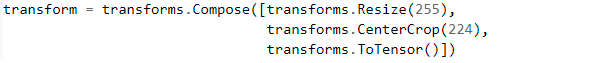

### Data Loaders

With the `ImageFolder` loaded, you have to pass it to a `DataLoader`. The `DataLoader` takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels.

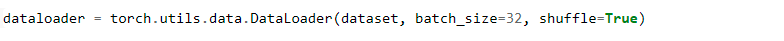

Iterating through the `DataLoader`
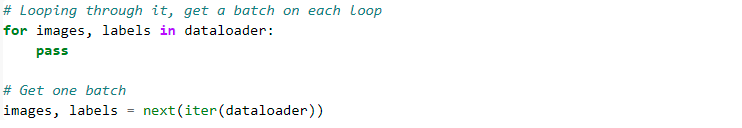

In [2]:
data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

<AxesSubplot:>

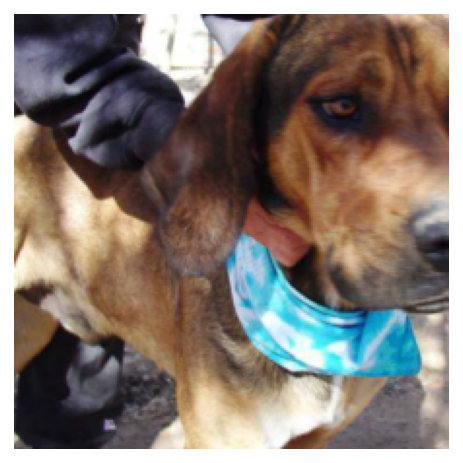

In [3]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

### Data Augmentation

In order to introduce randomness while training the neural network, we can randomly mirror, scale, rotate, and/or crop images while training.

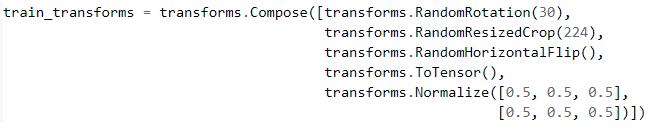

You'll also typically want to normalize images with transforms.Normalize. You pass in a list of means and list of standard deviations, then the color channels are normalized like so

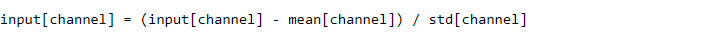

Subtracting mean centers the data around zero and dividing by std squishes the values to be between -1 and 1. Normalizing helps keep the network work weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

In [4]:
data_dir = 'Cat_Dog_data'

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

Train Loader:


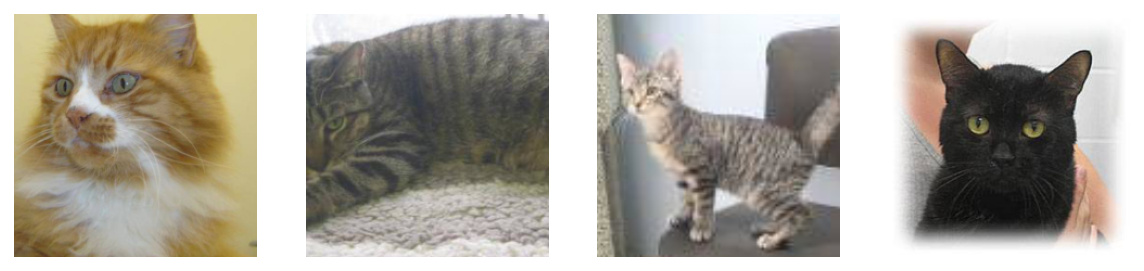

In [5]:
print('Train Loader:')

data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)


Test Loader:


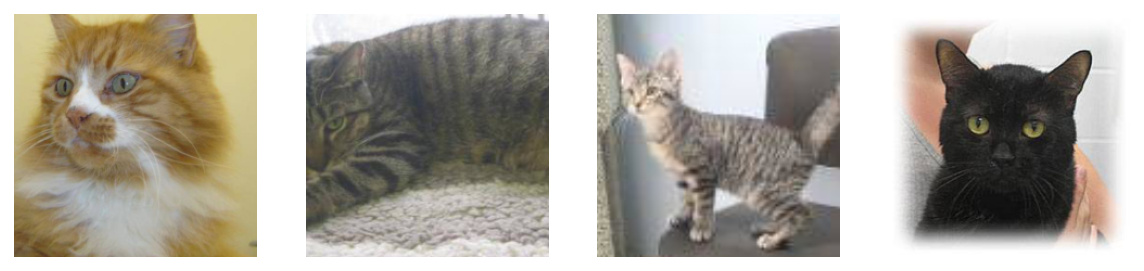

In [6]:
print('Test Loader:')

data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)
